In [1]:

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [4]:
import numpy as np
import mahotas as mh
import h5py

In [7]:
sys.path.append('../gp/')
import tifffile as tif

In [17]:
### TRAINING
import glob
golds = np.zeros((17*3,1250,1250), dtype=np.uint64)
probs = np.zeros((17*3,1250,1250), dtype=np.uint8)
rhoanas = np.zeros((17*3,1250,1250), dtype=np.uint64)

training_slices = range(17) + range(25,25+17) + range(50,50+17)
test_slices = range(17,25) + range(25+17,50) + range(50+17,75)
for i,z in enumerate(training_slices):
    DATADIR = '/home/d/data/CREMIGP/TEST/'

    prob = sorted(glob.glob(DATADIR+'prob/*'))
    gold = sorted(glob.glob(DATADIR+'gold/*'))
    rhoana = sorted(glob.glob(DATADIR+'segmentation/*'))
    
    prob = tif.imread(prob[z])
    gold = tif.imread(gold[z])
    rhoana = mh.imread(rhoana[z])
    
    rhoana_single = np.zeros((rhoana.shape[0], rhoana.shape[1]), dtype=np.uint64)
    rhoana_single[:, :] = rhoana[:,:,0]*256*256 + rhoana[:,:,1]*256 + rhoana[:,:,2]    
    
    golds[i] = gold
    probs[i] = prob
    rhoanas[i] = rhoana_single
    
    

In [21]:
rhoanas.max()

7229

In [23]:
#
# create gold h5 for neuroproof
#
all_labels = mh.fullhistogram(golds.astype(np.uint32))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint32)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]
print 'generated transforms.'

with h5py.File('/home/d/FP/CREMI/gold.h5', 'w') as hf:
    hf.create_dataset('stack', data=golds.astype(np.uint32))
    hf.create_dataset('transforms', data=transforms)
    
#
# create rhoana h5 for neuroproof
#
all_labels = mh.fullhistogram(rhoanas.astype(np.uint32))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint32)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/FP/CREMI/rhoana.h5', 'w') as hf:
    hf.create_dataset('stack', data=rhoanas.astype(np.uint32))
    hf.create_dataset('transforms', data=transforms)
    
#
# probs for neuroproof
#
p1 = probs.copy()
# has to be x,y,z
p1 = p1.swapaxes(0,2)
p1 = p1.swapaxes(0,1)

p2 = p1.copy()
p2 = 255-p2
p_2channels = np.zeros((probs.shape[2],probs.shape[1],probs.shape[0],2), dtype=np.float32)
p_2channels[:,:,:,0] = p1 / 255.
p_2channels[:,:,:,1] = p2 / 255.
with h5py.File('/home/d/FP/CREMI/prob.h5', 'w') as hf:
    hf.create_dataset('volume/predictions', data=p_2channels)

generated transforms.


In [5]:
import glob
golds = np.zeros((250,2048,2048), dtype=np.uint32)

path = '/home/d/data/cylinderNEW/'
for z in range(0,250):
    gold = sorted(glob.glob(os.path.join(path, 'gold', '*'+str(z)+'.png')))
    gold = mh.imread(gold[0])
    gold_single = np.zeros((gold.shape[0], gold.shape[1]), dtype=np.uint32)
    gold_single[:, :] = gold[:,:,0]*256*256 + gold[:,:,1]*256 + gold[:,:,2]
    
    golds[z] = gold_single
#
# create gold h5 for neuroproof
#
all_labels = mh.fullhistogram(golds.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint32)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]
print 'generated transforms.'

with h5py.File('/home/d/fp_data/c_gold2.h5', 'w') as hf:
    hf.create_dataset('stack', data=golds)
    hf.create_dataset('transforms', data=transforms)

generated transforms.


In [6]:
import glob
rhoanas = np.zeros((250,2048,2048), dtype=np.uint32)

path = '/home/d/data/cylinderNEW/'
for z in range(0,250):
    rhoana = sorted(glob.glob(os.path.join(path, 'rhoana', '*'+str(z)+'.png')))
    rhoana = mh.imread(rhoana[0])
    rhoana_single = np.zeros((rhoana.shape[0], rhoana.shape[1]), dtype=np.uint32)
    rhoana_single[:, :] = rhoana[:,:,0]*256*256 + rhoana[:,:,1]*256 + rhoana[:,:,2]
    
    rhoanas[z] = rhoana_single
    
#
# create rhoana h5 for neuroproof
#
all_labels = mh.fullhistogram(rhoanas.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint32)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/fp_data/training/c_rhoana2.h5', 'w') as hf:
    hf.create_dataset('stack', data=rhoanas)
    hf.create_dataset('transforms', data=transforms)

In [6]:
import glob
import tifffile as tif
probs = np.zeros((250,2048,2048), dtype=np.uint8)

path = '/home/d/data/cylinderNEW/'
for z in range(0,250):
    prob = sorted(glob.glob(os.path.join(path, 'prob', '*'+str(z)+'.tif')))
    prob = tif.imread(prob[0])
    mask = sorted(glob.glob(os.path.join(path, 'mask', '*'+str(z)+'.png')))
    mask = mh.imread(mask[0]).astype(np.bool)
    masked_prob = prob
    masked_prob = 255 - masked_prob
    masked_prob[mask==0] = 0
    
    probs[z] = masked_prob
    

#
# create prob h5 for neuroproof
#
p1 = probs
# has to be x,y,z
p1 = p1.swapaxes(0,2)
p1 = p1.swapaxes(0,1)

p2 = p1.copy()
p2 = 255-p2
p_2channels = np.zeros((probs.shape[2],probs.shape[1],probs.shape[0],2), dtype=np.float32)
p_2channels[:,:,:,0] = p1 / 255.
p_2channels[:,:,:,1] = p2 / 255.
with h5py.File('/home/d/fp_data/training/c_prob2.h5', 'w') as hf:
    hf.create_dataset('volume/predictions', data=p_2channels)

In [19]:
sys.path.append('../gp/')

In [2]:
import h5py

In [7]:
hf = h5py.File('/home/d/FP/c_prob.h5', 'r')
print hf['volume/predictions'].value.shape

(2048, 2048, 250, 2)


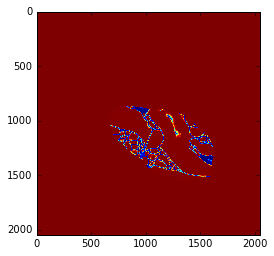

In [12]:
imshow(hf['volume/predictions'][:,:,20,1])

In [10]:
hf['volume/predictions'][:,:,20,0].max()

1.0

In [15]:
import glob, os
rhoanas = np.zeros((250,2048,2048), dtype=np.uint32)

path = '/home/d/cylinder/'
for z in range(0,250):
    rhoana = sorted(glob.glob(os.path.join(path, 'segmentation', '*_'+str(z).zfill(9)+'_segmentation.png')))
    rhoana = mh.imread(rhoana[0])
    rhoana_single = np.zeros((rhoana.shape[0], rhoana.shape[1]), dtype=np.uint32)
    rhoana_single[:, :] = rhoana[:,:,0]*256*256 + rhoana[:,:,1]*256 + rhoana[:,:,2]
    
    rhoanas[z] = rhoana_single
    
#
# create rhoana h5 for neuroproof
#
all_labels = mh.fullhistogram(rhoanas.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint32)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/FP/c_rhoana.h5', 'w') as hf:
    hf.create_dataset('stack', data=rhoanas)
    hf.create_dataset('transforms', data=transforms)

In [ ]:
# TEST DATA (LAST 50 slices)

In [16]:
import glob, os
rhoanas = np.zeros((50,2048,2048), dtype=np.uint32)

path = '/home/d/cylinder/'
for i,z in enumerate(range(250,300)):
    rhoana = sorted(glob.glob(os.path.join(path, 'segmentation', '*_'+str(z).zfill(9)+'_segmentation.png')))
    rhoana = mh.imread(rhoana[0])
    rhoana_single = np.zeros((rhoana.shape[0], rhoana.shape[1]), dtype=np.uint32)
    rhoana_single[:, :] = rhoana[:,:,0]*256*256 + rhoana[:,:,1]*256 + rhoana[:,:,2]
    
    rhoanas[i] = rhoana_single
    
#
# create rhoana h5 for neuroproof
#
all_labels = mh.fullhistogram(rhoanas.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint32)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/FP/test/c_rhoana.h5', 'w') as hf:
    hf.create_dataset('stack', data=rhoanas)
    hf.create_dataset('transforms', data=transforms)

In [20]:
import glob
import tifffile as tif
probs = np.zeros((50,2048,2048), dtype=np.uint8)

path = '/home/d/data/cylinderNEW/'
for i,z in enumerate(range(250,300)):
    prob = sorted(glob.glob(os.path.join(path, 'prob', '*'+str(z)+'.tif')))
    prob = tif.imread(prob[0])
    mask = sorted(glob.glob(os.path.join(path, 'mask', '*'+str(z)+'.png')))
    mask = mh.imread(mask[0]).astype(np.bool)
    masked_prob = prob
    masked_prob = 255 - masked_prob
    masked_prob[mask==0] = 0
    
    probs[i] = masked_prob
    

#
# create prob h5 for neuroproof
#
p1 = probs
# has to be x,y,z
p1 = p1.swapaxes(0,2)
p1 = p1.swapaxes(0,1)

p2 = p1.copy()
p2 = 255-p2
p_2channels = np.zeros((probs.shape[2],probs.shape[1],probs.shape[0],2), dtype=np.float32)
p_2channels[:,:,:,0] = p1 / 255.
p_2channels[:,:,:,1] = p2 / 255.
with h5py.File('/home/d/FP/test/c_prob.h5', 'w') as hf:
    hf.create_dataset('volume/predictions', data=p_2channels)

In [21]:
import glob
golds = np.zeros((50,2048,2048), dtype=np.uint32)

path = '/home/d/data/cylinderNEW/'
for i,z in enumerate(range(250,300)):
    gold = sorted(glob.glob(os.path.join(path, 'gold', '*'+str(z)+'.png')))
    gold = mh.imread(gold[0])
    gold_single = np.zeros((gold.shape[0], gold.shape[1]), dtype=np.uint32)
    gold_single[:, :] = gold[:,:,0]*256*256 + gold[:,:,1]*256 + gold[:,:,2]
    
    golds[i] = gold_single
#
# create gold h5 for neuroproof
#
all_labels = mh.fullhistogram(golds.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint32)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]
print 'generated transforms.'

with h5py.File('/home/d/FP/test/c_gold.h5', 'w') as hf:
    hf.create_dataset('stack', data=golds)
    hf.create_dataset('transforms', data=transforms)

generated transforms.
